In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import category_scatter
from sklearn.cluster import KMeans

%matplotlib inline

In [238]:
Combined_data = pd.read_csv('E:/ML/novel-corona-virus-2019-dataset/Converted/new_data3.csv')

In [239]:
Combined_data_60 = Combined_data[(Combined_data['NthDay']==60)]

In [240]:
Combined_data_60 = Combined_data_60.drop(['NthDay','Province/State'], axis = 1)

In [241]:
Combined_data_60.describe()

,Population Density,Age70+,HospitalBeds,GDP,CasePC
count,242.000000,234.000000,233.000000,236.000000,241.000000
mean,312.298347,7.483576,3.270490,21845.604246,515.512500
std,1780.464452,4.828472,2.148217,25867.747101,1643.347407
min,2.100000,0.644299,0.100000,271.752044,0.000697
25%,35.925000,2.839414,1.600000,4091.424122,2.364512
50%,114.950000,6.489206,2.800000,9770.847088,40.828149
75%,193.975000,12.042983,4.200000,41526.490335,292.268762
max,26338.300000,21.151499,13.800000,185741.280000,15888.954519


In [242]:
Combined_data_60.isnull().sum()

Population Density    20
Age70+                28
HospitalBeds          29
GDP                   26
CasePC                21
dtype: int64

In [243]:
Combined_data_60.dropna(inplace = True)

In [244]:
Combined_data_60.describe()

,Population Density,Age70+,HospitalBeds,GDP,CasePC
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,197.884305,7.611060,3.257059,21012.724655,351.490935
std,602.479068,4.839501,2.044420,21793.147199,815.254523
min,2.100000,0.644299,0.100000,271.752044,0.000697
25%,30.800000,3.065322,1.600000,4179.022527,1.947217
50%,111.300000,6.489206,2.800000,9770.847088,35.643180
75%,153.300000,12.042983,4.200000,41463.644020,280.884800
max,8357.600000,21.151499,13.400000,116639.888000,6075.715005


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017051341A90>,
      dtype=object)

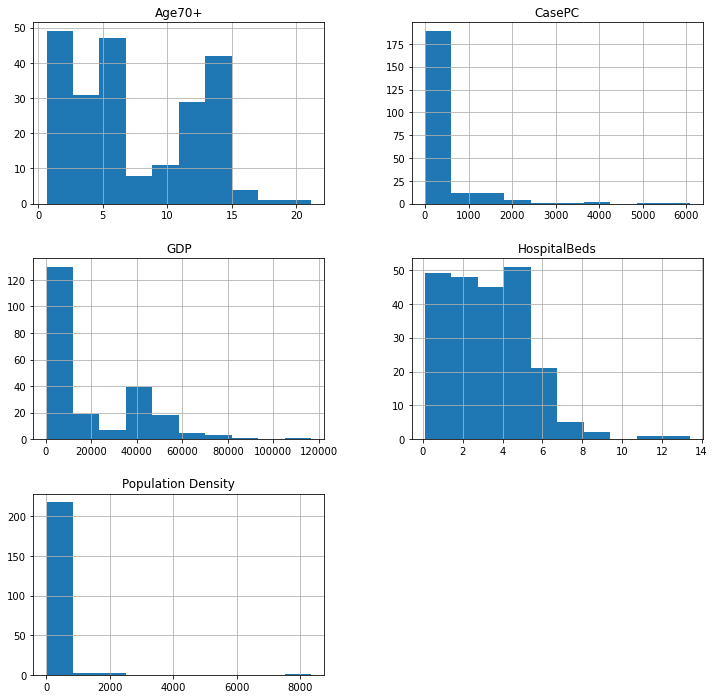

In [245]:
Combined_data_60.hist(figsize=(12,12))

In [246]:
Combined_data_60['CasePC'] = np.log(Combined_data_60['CasePC'])
Combined_data_60['GDP'] = np.log(Combined_data_60['GDP'])
Combined_data_60['Population Density'] = np.log(Combined_data_60['Population Density'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170559A0240>,
      dtype=object)

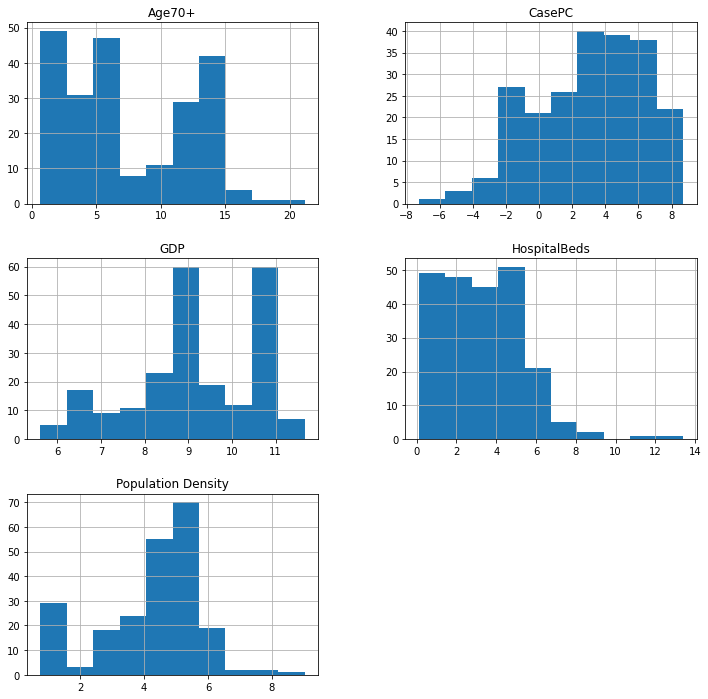

In [247]:
Combined_data_60.hist(figsize=(12,12))

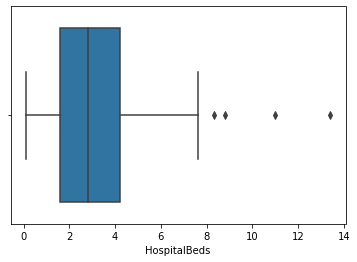

In [248]:
sns.boxplot(x=Combined_data_60['HospitalBeds'])

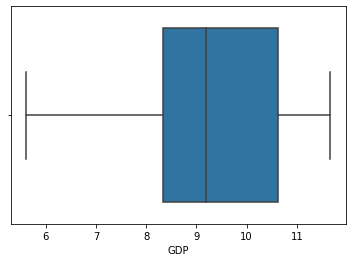

In [249]:
sns.boxplot(x=Combined_data_60['GDP'])

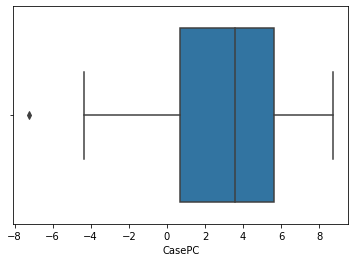

In [250]:
sns.boxplot(x=Combined_data_60['CasePC'])

In [251]:
Combined_data_60.describe()

,Population Density,Age70+,HospitalBeds,GDP,CasePC
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,4.288142,7.611060,3.257059,9.206996,3.018490
std,1.521715,4.839501,2.044420,1.427244,3.246379
min,0.741937,0.644299,0.100000,5.604890,-7.268072
25%,3.427383,3.065322,1.600000,8.337801,0.666175
50%,4.712229,6.489206,2.800000,9.187158,3.573558
75%,5.032397,12.042983,4.200000,10.632572,5.637944
max,9.030927,21.151499,13.400000,11.666847,8.712055


In [252]:
Q1 = Combined_data_60.quantile(0.25)
Q3 = Combined_data_60.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Population Density    1.605014
Age70+                8.977661
HospitalBeds          2.600000
GDP                   2.294771
CasePC                4.971769
dtype: float64


In [253]:
Combined_data_60 = Combined_data_60[~((Combined_data_60 < (Q1 - 1.5 * IQR)) |(Combined_data_60 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [254]:
Combined_data_60.describe()

,Population Density,Age70+,HospitalBeds,GDP,CasePC
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.237117,7.570828,3.107122,9.192097,2.982547
std,1.456400,4.765269,1.794335,1.439250,3.187049
min,1.131402,0.644299,0.100000,5.604890,-4.377700
25%,3.307810,3.087538,1.600000,8.333847,0.610932
50%,4.700926,6.489206,2.800000,9.187158,3.496630
75%,5.032397,12.042983,4.200000,10.632572,5.562454
max,7.229694,17.177110,7.600000,11.666847,8.712055


### multicollinearity

In [255]:
corr = Combined_data_60.corr()

In [256]:
display(corr)

,Population Density,Age70+,HospitalBeds,GDP,CasePC
Population Density,1.000000,0.003798,0.103211,-0.102176,-0.095905
Age70+,0.003798,1.000000,0.647761,0.806254,-0.016284
HospitalBeds,0.103211,0.647761,1.000000,0.586652,-0.110054
GDP,-0.102176,0.806254,0.586652,1.000000,-0.003139
CasePC,-0.095905,-0.016284,-0.110054,-0.003139,1.000000


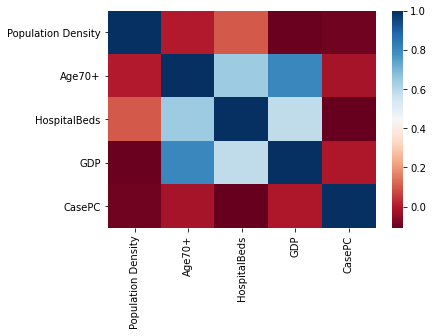

In [257]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [258]:
Combined_data_60.shape

(214, 5)

In [259]:
VIF_before = Combined_data_60
VIF_after = Combined_data_60.drop(['Age70+'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(VIF_before)
X2 = sm.tools.add_constant(VIF_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                 101.222762
Population Density      1.066367
Age70+                  3.320935
HospitalBeds            1.833141
GDP                     3.040666
CasePC                  1.024617
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 66.552231
Population Density     1.059230
HospitalBeds           1.612043
GDP                    1.595476
CasePC                 1.023464
dtype: float64

In [260]:
Combined_data_60 = Combined_data_60.drop(['Age70+'], axis = 1)

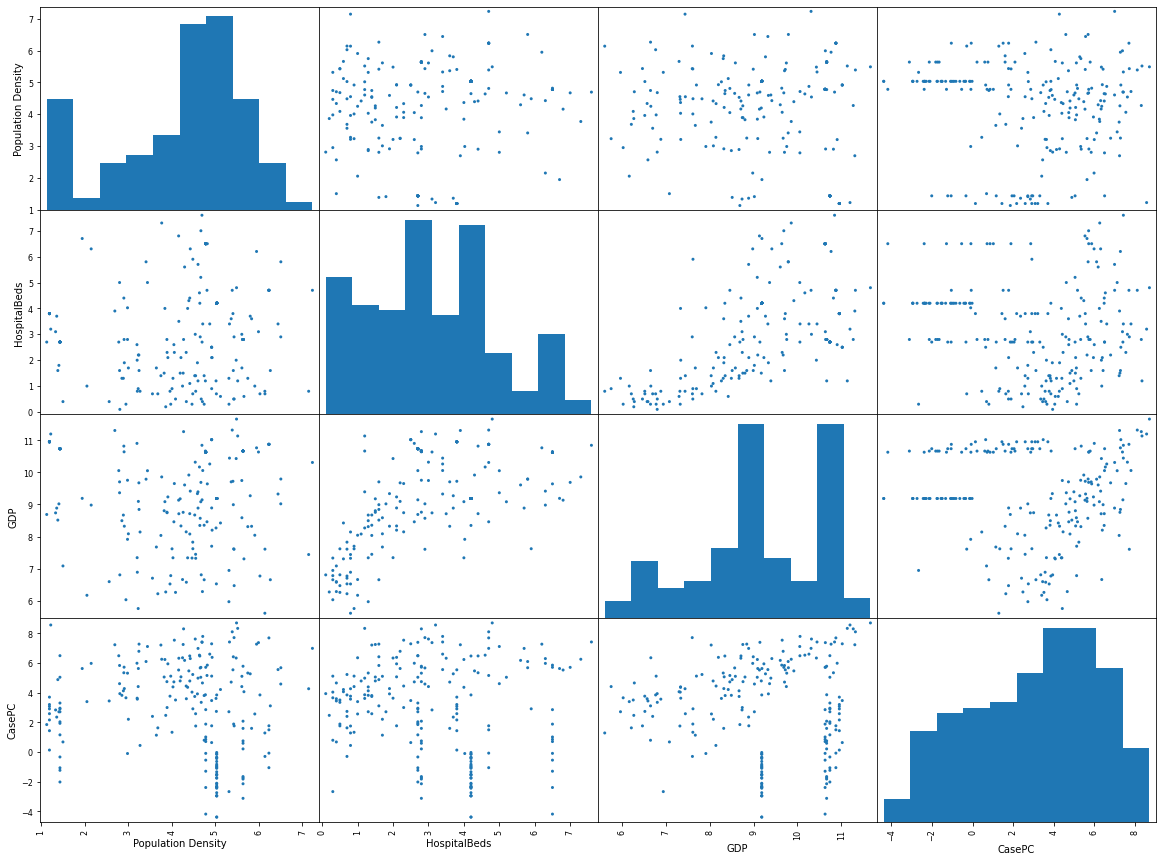

In [261]:
pd.plotting.scatter_matrix(Combined_data_60, alpha = 1, figsize = (20, 15))
plt.show()

### Regression

In [262]:
Combined_data_60

,Population Density,HospitalBeds,GDP,CasePC
15580,4.087656,0.5,6.255552,3.515149
15581,4.653960,2.9,8.569567,5.677674
15582,2.912351,1.9,8.322325,4.285396
15584,3.273364,0.8,8.141011,0.451761
15585,5.405376,3.8,9.724778,5.550684
...,...,...,...,...
15834,6.230875,4.7,10.878501,-1.047151
15835,5.312713,1.3,5.964602,2.724268
15836,5.636930,2.8,10.667650,-1.647625
15837,4.780803,6.5,10.632572,-4.176381


In [263]:
mms = MinMaxScaler()
mms.fit(Combined_data_60)
transform = mms.transform(Combined_data_60)

In [264]:
data_transformed = pd.DataFrame(transform, columns = Combined_data_60.columns)

In [265]:
X= data_transformed.drop(['CasePC'], axis =1)
Y= data_transformed['CasePC']

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [267]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [268]:
print(reg.coef_)

[-0.05683187 -0.19691025  0.1137559 ]


In [269]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)

print ("Benchmark Model, Training Mean Squared Error:", mean_squared_error(y_train, reg.predict(X_train)))
print ("Benchmark Model, Testing Mean Squared Error:", mean_squared_error(y_test, y_pred))

Benchmark Model, Training Mean Squared Error: 0.0574011891220553
Benchmark Model, Testing Mean Squared Error: 0.05908770026992739


0.02292616865421815 0.008967971063564173


Text(0.5, 1.0, 'Residual plot')

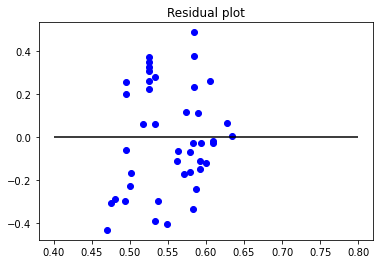

In [270]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(Y, X1).fit()

print(result.rsquared, result.rsquared_adj)

x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= 0.4, xmax=0.8)

plt.title('Residual plot')

In [271]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 CasePC   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.642
Date:                Sun, 14 Jun 2020   Prob (F-statistic):              0.181
Time:                        20:18:50   Log-Likelihood:                 1.6552
No. Observations:                 214   AIC:                             4.690
Df Residuals:                     210   BIC:                             18.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6143      0

### Cluster

In [273]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(transform)
    Sum_of_squared_distances.append(km.inertia_)

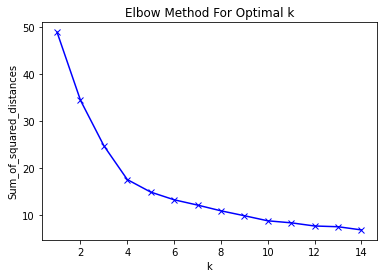

In [274]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [275]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(transform)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

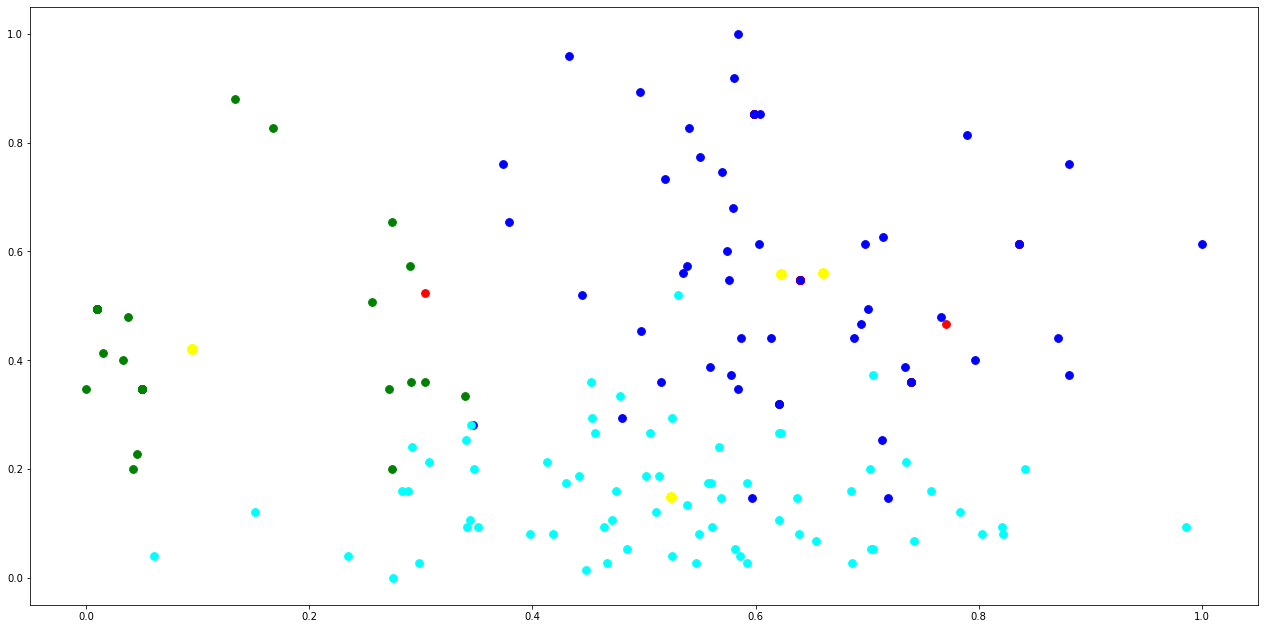

In [276]:
y_kmeans = kmeans.predict(transform)

plt.figure(figsize =(22,11))
plt.scatter(transform[y_kmeans ==0,0], transform[y_kmeans == 0,1], s=60, c='red')
plt.scatter(transform[y_kmeans==1,0], transform[y_kmeans == 1,1], s=60, c='green')
plt.scatter(transform[y_kmeans ==2,0], transform[y_kmeans == 2,1], s=60, c='blue')
plt.scatter(transform[y_kmeans ==3,0], transform[y_kmeans == 3,1], s=60, c='cyan')
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')

d:\python 3.6.8\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
d:\python 3.6.8\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


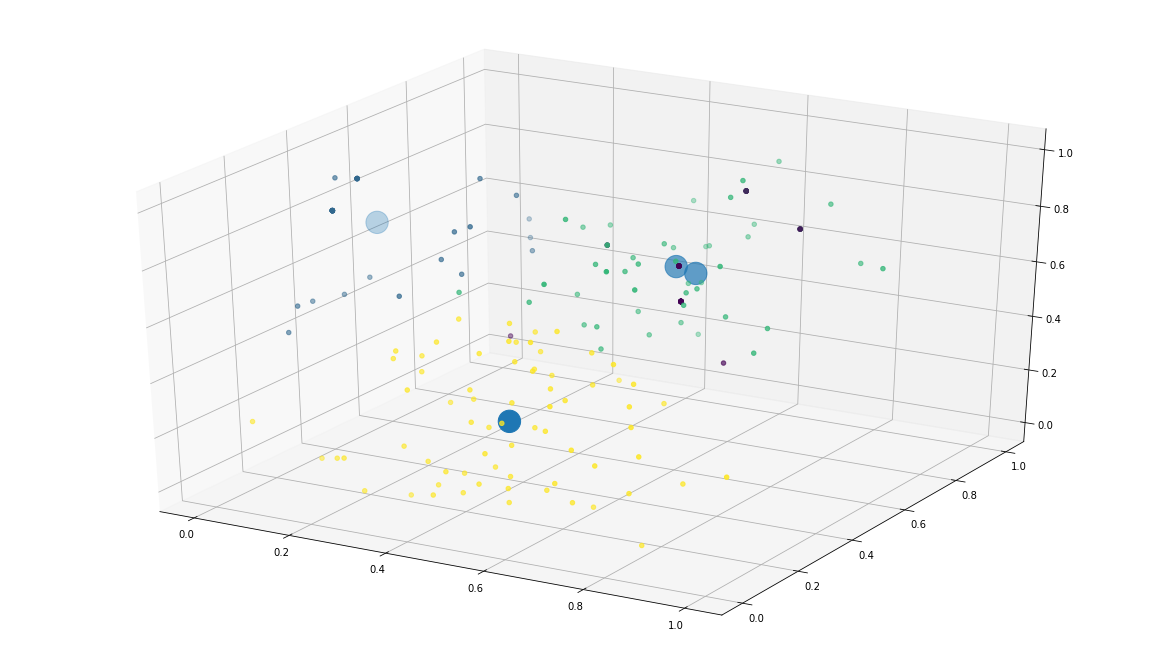

In [277]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(transform[:, 0], transform[:, 1], 
           transform[:, 2], transform[:, 3], c = y_kmeans)
C = kmeans.cluster_centers_
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], marker='o', c='#1f77b4', s=500)

In [278]:
Cluster = pd.DataFrame(y_kmeans)

In [279]:
Cluster

,0
0,3
1,2
2,3
3,3
4,2
...,...
209,0
210,3
211,0
212,0


In [280]:
Combined_data_60.index = range(len(Combined_data_60.index)) 

In [281]:
Combined_data_60['Cluster'] = Cluster

In [282]:
Combined_data_60

,Population Density,HospitalBeds,GDP,CasePC,Cluster
0,4.087656,0.5,6.255552,3.515149,3
1,4.653960,2.9,8.569567,5.677674,2
2,2.912351,1.9,8.322325,4.285396,3
3,3.273364,0.8,8.141011,0.451761,3
4,5.405376,3.8,9.724778,5.550684,2
...,...,...,...,...,...
209,6.230875,4.7,10.878501,-1.047151,0
210,5.312713,1.3,5.964602,2.724268,3
211,5.636930,2.8,10.667650,-1.647625,0
212,4.780803,6.5,10.632572,-4.176381,0


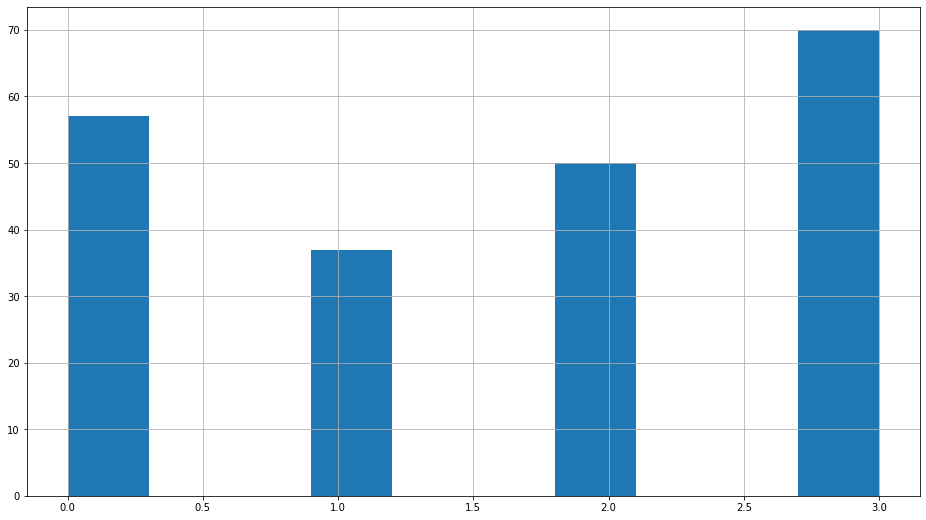

In [283]:
Combined_data_60['Cluster'].hist()

In [284]:
def reg(x):
    mms = MinMaxScaler()
    mms.fit(x)
    transform = mms.transform(x)
    data_transformed = pd.DataFrame(transform, columns = x.columns)
    X= data_transformed.drop(['CasePC'], axis =1)
    Y= data_transformed['CasePC']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    reg = LinearRegression()
    reg.fit(X, Y)
    print('coefficient')
    print('Population',' HospitalBeds',' GDP')
    print('Density')
    print(reg.coef_)
    print(' ')

    #y_pred = reg.predict(X_test)

    #print ("Benchmark Model, Training Mean Squared Error:", mean_squared_error(y_train, reg.predict(X_train)))
    #print ("Benchmark Model, Testing Mean Squared Error:", mean_squared_error(y_test, y_pred))
    #print(' ')

    import statsmodels.api as sm
    X1 = sm.add_constant(X)
    result = sm.OLS(Y, X1).fit()
    print(result.summary())

#     x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

#     plt.hlines(y=0, xmin= 0.4, xmax=0.8)

#     plt.title('Residual plot')

In [285]:
Cluster_0 = Combined_data_60[(Combined_data_60['Cluster']==0)]
Cluster_0 = Cluster_0.drop(['Cluster'], axis = 1)
Cluster_1 = Combined_data_60[(Combined_data_60['Cluster']==1)]
Cluster_1 = Cluster_1.drop(['Cluster'], axis = 1)
Cluster_2 = Combined_data_60[(Combined_data_60['Cluster']==2)]
Cluster_2 = Cluster_2.drop(['Cluster'], axis = 1)
Cluster_3 = Combined_data_60[(Combined_data_60['Cluster']==3)]
Cluster_3 = Cluster_3.drop(['Cluster'], axis = 1)

In [286]:
reg(Cluster_0)

coefficient
Population  HospitalBeds  GDP
Density
[0.10187935 0.01729498 0.28746934]
 
                            OLS Regression Results                            
Dep. Variable:                 CasePC   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.344
Date:                Sun, 14 Jun 2020   Prob (F-statistic):             0.0834
Time:                        20:18:51   Log-Likelihood:                 2.9032
No. Observations:                  57   AIC:                             2.194
Df Residuals:                      53   BIC:                             10.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [287]:
Cluster_0.shape

(57, 4)

In [288]:
reg(Cluster_1)

coefficient
Population  HospitalBeds  GDP
Density
[ 0.39315833  0.15281854 -0.04263903]
 
                            OLS Regression Results                            
Dep. Variable:                 CasePC   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     5.439
Date:                Sun, 14 Jun 2020   Prob (F-statistic):            0.00376
Time:                        20:18:51   Log-Likelihood:                 9.2497
No. Observations:                  37   AIC:                            -10.50
Df Residuals:                      33   BIC:                            -4.056
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [289]:
reg(Cluster_2)

coefficient
Population  HospitalBeds  GDP
Density
[-0.15009568 -0.05956088  0.49043258]
 
                            OLS Regression Results                            
Dep. Variable:                 CasePC   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     3.897
Date:                Sun, 14 Jun 2020   Prob (F-statistic):             0.0146
Time:                        20:18:51   Log-Likelihood:                 7.3975
No. Observations:                  50   AIC:                            -6.795
Df Residuals:                      46   BIC:                            0.8530
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [290]:
reg(Cluster_3)

coefficient
Population  HospitalBeds  GDP
Density
[-0.03344733  0.25931469  0.15230968]
 
                            OLS Regression Results                            
Dep. Variable:                 CasePC   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     5.496
Date:                Sun, 14 Jun 2020   Prob (F-statistic):            0.00197
Time:                        20:18:51   Log-Likelihood:                 28.857
No. Observations:                  70   AIC:                            -49.71
Df Residuals:                      66   BIC:                            -40.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

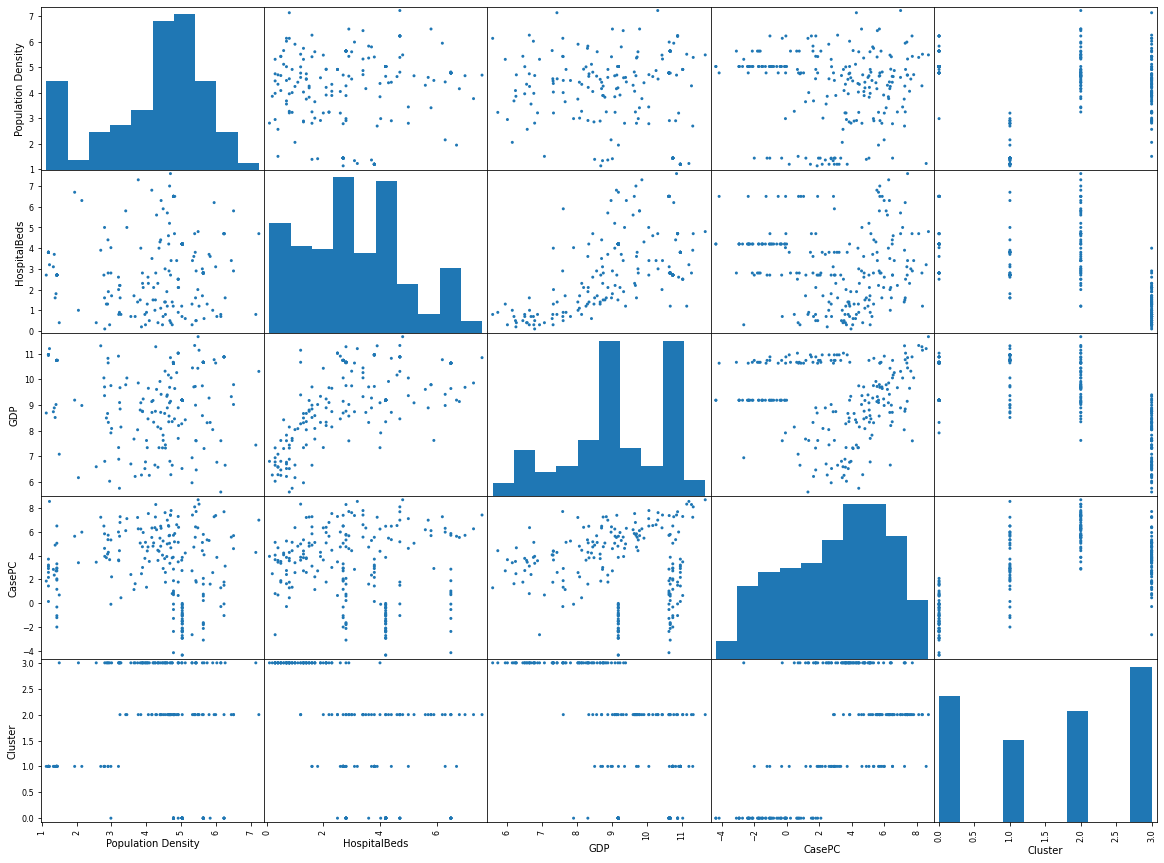

In [291]:
pd.plotting.scatter_matrix(Combined_data_60, alpha = 1, figsize = (20, 15))
plt.show()